In [1]:
from email_report import *
from models import find_chgpts
import matplotlib.pyplot as plt

In [2]:
# Generate random data
xs = [np.random.randn(np.random.randint(10, 20)) + mean for mean in [10, 14, 8, 11]]
x = np.concatenate(xs)
t = range(len(x))

alpha = 0.005

Text(0, 0.5, 'Values')

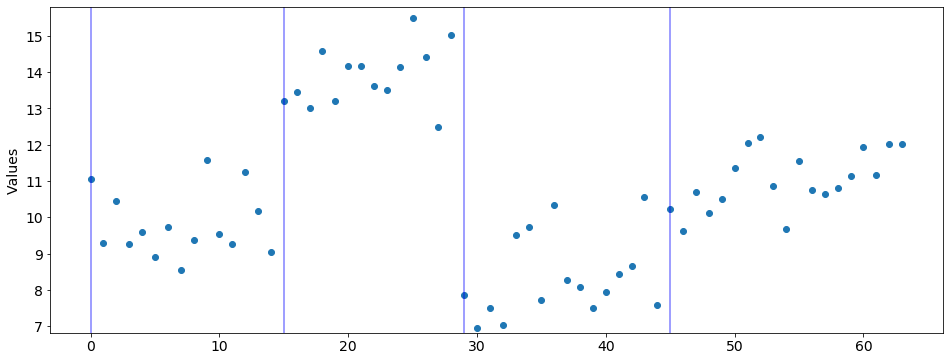

In [3]:
# Test changepoint detector
chgpts, detpts, votes = find_chgpts(x, alpha=alpha, num_test=5)
plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(16, 6))

plt.scatter(np.arange(len(x)), x)
# plt.xlim(0, len(x))
plt.ylim(x.min()*.98,x.max()*1.02)
plt.vlines(chgpts, x.min()-1, x.max()+1, color='blue', alpha=.5)
plt.ylabel('Values')

0 pass, 11.07, 11.07, 1.00
1 pass, 9.30, 10.15, 1.09
2 pass, 10.45, 10.24, 1.08
3 pass, 9.27, 9.99, 1.08
4 pass, 9.60, 9.91, 1.07
5 pass, 8.92, 9.74, 1.08
6 pass, 9.73, 9.74, 1.07
7 pass, 8.55, 9.58, 1.08
8 pass, 9.39, 9.56, 1.08
9 pass, 11.59, 9.74, 1.09
10 pass, 9.54, 9.73, 1.09
11 pass, 9.25, 9.69, 1.09
12 pass, 11.25, 9.80, 1.09
13 pass, 10.17, 9.82, 1.09
14 pass, 9.04, 9.77, 1.09
15 pass, 13.21, 9.96, 1.12
16 warn, 13.47, 10.13, 1.14
17 warn, 13.02, 10.28, 1.15
18 fail, 14.58, 10.47, 1.17
19 pass, 13.20, 13.49, 1.04
20 pass, 14.18, 13.60, 1.04
21 pass, 14.16, 13.68, 1.04
22 pass, 13.63, 13.67, 1.04
23 pass, 13.51, 13.65, 1.04
24 pass, 14.14, 13.70, 1.04
25 pass, 15.49, 13.86, 1.05
26 pass, 14.41, 13.90, 1.05
27 pass, 12.49, 13.79, 1.06
28 pass, 15.04, 13.87, 1.06
29 pass, 7.87, 13.36, 1.16
30 pass, 6.96, 12.82, 1.24
31 pass, 7.51, 12.43, 1.28
32 pass, 7.05, 7.34, 1.05
33 pass, 9.52, 7.73, 1.12
34 pass, 9.73, 8.03, 1.14
35 pass, 7.71, 7.99, 1.13
36 pass, 10.35, 8.25, 1.16
37 pass, 

(5.959646744558839, 16.494974334540238)

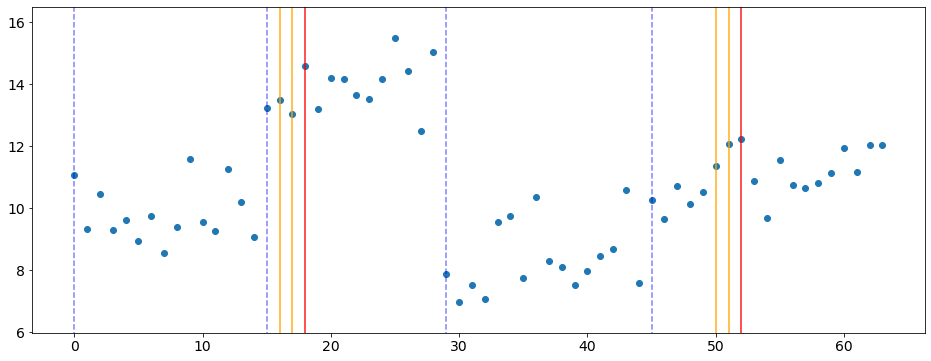

In [4]:
plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(16, 6))
for i in range(len(x)):
    output = changepoint_test(x[:i+1], alpha)
    if output[0] == 'warn':
        plt.vlines(i, -100, 100, color='orange', alpha=.9)
    if output[0] == 'fail':
        plt.vlines(i, -100, 100, color='red', alpha=.9)
    print(i, '%s, %.2f, %.2f, %.2f' % output)
    
plt.scatter(np.arange(len(x)), x)
plt.vlines(chgpts, -100, 100, color='blue', alpha=.5, linestyles='dashed')
plt.ylim(x.min()-1, x.max()+1)